
# Исследование данных некоммерческого проекта "Карты ДТП"

Автор: <b>Коваль Артём</b>

### Вопросы заказчика

1. Определите, сколько ДТП случалось в каждый день недели. Также покажите число происшествий по месяцам.

2. Выделите категории водителей по стажу. Определите, существуют ли категории, которые значительно отличаются по числу ДТП. Небольшая подсказка: для этого вам понадобится датафрейм с участниками ДТП.

3. Проанализируйте, как менялось число аварий по годам в Кировской и Московской областях. При этом включите город Киров в соответствующую область, а Москву исключите. Также определите, в какой области больше аварий в относительном выражении — в пересчёте на 100 тысяч жителей.

4. Как распределено количество участников ДТП и почему? Встречаются ли аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Для числа участников найдите наиболее типичное значение. По желанию можете проверить распределения и других столбцов.

5. Предположите, между какими столбцами в датасете `Kirovskaya_oblast.csv` высокая корреляция. Проверьте своё предположение.  

6. Как связаны категории аварий и погодные условия?

7. Постройте процентную разбивку аварий по видам освещённости. При этом учитывайте пол участника и сделайте расчёты для мужчин и женщин отдельно.

8. Исследуйте, чем отличаются аварии без пострадавших от тех, в которых был один пострадавший или более.

9. Сделайте общий вывод о связи аварийности с другими факторами. Какие рекомендации вы можете дать заказчику?

## Описание данных

Датасет `Kirovskaya_oblast.csv` содержит информацию о ДТП в Кировской области:

* `geometry.coordinates` — координаты ДТП;

* `id` — идентификатор ДТП;

* `properties.tags` — тег происшествия;

* `properties.light` — освещённость;

* `properties.point.lat` — широта;

* `properties.point.long` — долгота;

* `properties.nearby` — ближайшие объекты;

* `properties.region` — регион;

* `properties.scheme` — схема ДТП;

* `properties.address` — ближайший адрес;

* `properties.weather` — погода;

* `properties.category` — категория ДТП;

* `properties.datetime` — дата и время ДТП;

* `properties.injured_count` — число пострадавших;

* `properties.parent_region` — область;

* `properties.road_conditions` — состояние покрытия;

* `properties.participants_count` — число участников;

* `properties.participant_categories` — категории участников.

`Kirovskaya_oblast_participiants.csv` хранит сведения об участниках:

* `role` — роль;

* `gender` — пол;

* `violations` — какие правила дорожного движения были нарушены конкретным участником;

* `health_status` — состояние здоровья после ДТП;

* `years_of_driving_experience` — число лет опыта;

* `id` — идентификатор ДТП.

## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `Kirovskaya_oblast` и `Kirovskaya_oblast_participiants`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `df` и `df_p`.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix
import datetime as dt

In [9]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast.csv')
df.columns = [c.replace('properties.', '') for c in df.columns]
df.head()

,geometry.coordinates,id,tags,light,point.lat,point.long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geometry.coordinates    14517 non-null  object 
 1   id                      14517 non-null  int64  
 2   tags                    14517 non-null  object 
 3   light                   14517 non-null  object 
 4   point.lat               14485 non-null  float64
 5   point.long              14485 non-null  float64
 6   nearby                  14517 non-null  object 
 7   region                  14517 non-null  object 
 8   scheme                  13380 non-null  float64
 9   address                 13843 non-null  object 
 10  weather                 14517 non-null  object 
 11  category                14517 non-null  object 
 12  datetime                14517 non-null  object 
 13  injured_count           14517 non-null  int64  
 14  parent_region           14517 non-null

Датасет `Kirovskaya_oblast.csv` содержит 18 столбцов и 14517 строк, в которых представлена информация о ДТП

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов не все в виде snake_case
- Все представленные данные хранятся в типах данных `int64`,  `float64`, `object`
- Пропуски содержатся только в столбцах `point.lat`, `point.long`, `scheme`, `address`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- Замечен столбец `id` - первичный ключ датасета.

In [10]:
df_p = pd.read_csv('https://code.s3.yandex.net/datasets/Kirovskaya_oblast_participiants.csv')
df_p.columns = [c.replace('properties.', '') for c in df_p.columns]
df_p.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,Водитель,Мужской,[],Не пострадал,34.0,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
3,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
4,Водитель,Мужской,[],Не пострадал,27.0,2577639


In [12]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         31235 non-null  object 
 1   gender                       30387 non-null  object 
 2   violations                   31235 non-null  object 
 3   health_status                31135 non-null  object 
 4   years_of_driving_experience  16909 non-null  float64
 5   id                           31235 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


Датасет `Kirovskaya_oblast_participiants.csv` содержит 6 столбцов и 31235 строк, в которых представлена информация об участниках ДТП

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов все в виде snake_case
- Все представленные данные хранятся в типах данных `int64`,  `float64`, `object`
- Пропуски содержатся только в столбцах `gender`, `health_status`, `years_of_driving_experience`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.
- Замечен столбец `id` - первичный ключ датасета.

Первичное знакомство показывает, что данные хорошего качества — они соответствуют описанию и выглядят корректными. Настало время следующего этапа — предобработки данных.

## 2. Предобработка данных

### 2.1. Оптимизируем названия столбцов

Здесь работы не так много — понадобится только провести замену `.` на `_` столбцов датасета `Kirovskaya_oblast`.

In [15]:
df.columns = df.columns.str.replace('.', '_', regex=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geometry_coordinates    14517 non-null  object 
 1   id                      14517 non-null  int64  
 2   tags                    14517 non-null  object 
 3   light                   14517 non-null  object 
 4   point_lat               14485 non-null  float64
 5   point_long              14485 non-null  float64
 6   nearby                  14517 non-null  object 
 7   region                  14517 non-null  object 
 8   scheme                  13380 non-null  float64
 9   address                 13843 non-null  object 
 10  weather                 14517 non-null  object 
 11  category                14517 non-null  object 
 12  datetime                14517 non-null  object 
 13  injured_count           14517 non-null  int64  
 14  parent_region           14517 non-null

### 2.2. Оптимизируем типы данных

In [18]:
df.columns

Index(['geometry_coordinates', 'id', 'tags', 'light', 'point_lat',
       'point_long', 'nearby', 'region', 'scheme', 'address', 'weather',
       'category', 'datetime', 'injured_count', 'parent_region',
       'road_conditions', 'participants_count', 'participant_categories'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   geometry_coordinates    14517 non-null  object 
 1   id                      14517 non-null  int64  
 2   tags                    14517 non-null  object 
 3   light                   14517 non-null  object 
 4   point_lat               14485 non-null  float64
 5   point_long              14485 non-null  float64
 6   nearby                  14517 non-null  object 
 7   region                  14517 non-null  object 
 8   scheme                  13380 non-null  float64
 9   address                 13843 non-null  object 
 10  weather                 14517 non-null  object 
 11  category                14517 non-null  object 
 12  datetime                14517 non-null  object 
 13  injured_count           14517 non-null  int64  
 14  parent_region           14517 non-null

* В `coordinates` располагается пара значений. С ней неудобно взаимодействовать, к тому же отдельно существуют столбцы `point_lat`, `point_long`, которые более самодостаточны. Можно дать рекомендацию избавиться от `coordinates`.
* Для столбца `id` достаточно `int32`, что сэкономит место.
* Для `participants_count`, `injured_count` достаточно `int8`.
* Для `scheme` — `int16`. Нужно заменить пропуски заглушкой и округлить значения (десятичная часть в этом случае не несёт никакой смысловой нагрузки).
* Есть ряд столбцов  (`nearby`, `weather`,`road_conditions`, `participant_categories`), в которых есть списки. С ними неудобно работать, но в рамках задания это делать не придётся. Оставляем тип `object`.
* Строковые столбцы (`tags`, `light`,  `region`,  `address`,`category`, `parent_region`) можно оставить в текущем виде, потому что в них действительно располагаются строки.

In [20]:
df_p.columns

Index(['role', 'gender', 'violations', 'health_status',
       'years_of_driving_experience', 'id'],
      dtype='object')

In [21]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         31235 non-null  object 
 1   gender                       30387 non-null  object 
 2   violations                   31235 non-null  object 
 3   health_status                31135 non-null  object 
 4   years_of_driving_experience  16909 non-null  float64
 5   id                           31235 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [22]:
df_p.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,Водитель,Мужской,[],Не пострадал,34.0,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
3,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
4,Водитель,Мужской,[],Не пострадал,27.0,2577639


Во всех столбцах нужные типы данных, за исключением `years_of_driving_experience`, здесь можно заменить на целочисленный тип данных Int64

In [24]:
# Оптимизируем целочисленный тип данных в датафрейме df
df_p['years_of_driving_experience'] = df_p['years_of_driving_experience'].astype('Int64')

In [25]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   role                         31235 non-null  object
 1   gender                       30387 non-null  object
 2   violations                   31235 non-null  object
 3   health_status                31135 non-null  object
 4   years_of_driving_experience  16909 non-null  Int64 
 5   id                           31235 non-null  int64 
dtypes: Int64(1), int64(1), object(4)
memory usage: 1.5+ MB


Теперь все столбцы обладают нужным типом данных

### 2.3. Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски в столбцах `point.lat`, `point.long`, `scheme`, `address` датафрейма `df` и `gender`, `health_status`, `years_of_driving_experience` датафрейма `df_p`. Узнаем абсолютное и относительное количество пропусков в этих столбцах.

In [26]:
# Применяем метод isna() к датафрейму df
df.isna().sum()

geometry_coordinates         0
id                           0
tags                         0
light                        0
point_lat                   32
point_long                  32
nearby                       0
region                       0
scheme                    1137
address                    674
weather                      0
category                     0
datetime                     0
injured_count                0
parent_region                0
road_conditions              0
participants_count           0
participant_categories       0
dtype: int64

In [29]:
# Подсчитываем долю строк с пропусками
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

scheme                    0.078322
address                   0.046428
point_lat                 0.002204
point_long                0.002204
category                  0.000000
participants_count        0.000000
road_conditions           0.000000
parent_region             0.000000
injured_count             0.000000
datetime                  0.000000
geometry_coordinates      0.000000
weather                   0.000000
id                        0.000000
region                    0.000000
nearby                    0.000000
light                     0.000000
tags                      0.000000
participant_categories    0.000000
dtype: float64

В датафрейме `df` обнаружено 1875 пропусков, в столбцах `point_lat` и `point_long` всего 0,2% - это очень мало, поэтому их можно удалить, в столбцах `scheme` и `address` 8% и 5% пропусков, это количество тоже не такое большое, можно удалить пропуски и в этих столбцах.

In [30]:
# Применяем метод isna() к датафрейму df
df_p.isna().sum()

role                               0
gender                           848
violations                         0
health_status                    100
years_of_driving_experience    14326
id                                 0
dtype: int64

In [31]:
# Подсчитываем долю строк с пропусками
(df_p.isna().sum() / df_p.shape[0]).sort_values(ascending=False)

years_of_driving_experience    0.458652
gender                         0.027149
health_status                  0.003202
role                           0.000000
violations                     0.000000
id                             0.000000
dtype: float64

В датафрейме `df_p` обнаружено 15274 пропусков, в столбцах `health_status` и `gender` всего 0,3% и 3% - это очень мало, поэтому их можно удалить, чего не сказать о столбце `years_of_driving_experience`, там аж 46% пропусков, скорее всего, это произошло из-за технического сбоя, ведь у всех, кто водит, есть хоть какой-то стаж вождения. Пока не будем трогать этот столбец, чтобы не потерять нужные данные в других столбцах.

### 2.4. Явные и неявные дубликаты в данных

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [32]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

In [33]:
# Проверяем полные дубликаты в датафрейме df_price
df_p.duplicated().sum()

9727

In [41]:
print('Процент явных дубликатов в датафрейме df_p:')
round((df_p.duplicated().sum() / df_p.shape[0]) * 100, 2)

Процент явных дубликатов в датафрейме df_p:


31.14

В датафрейме `df_p` есть полные дубликаты строк (31%), их стоит удалить. Проверим неявные дубликаты — значения по `id` должны быть уникальными.

In [39]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='id').sum()

0

In [40]:
# Проверяем неявные дубликаты в датафрейме df_price
df_p.duplicated(subset='id').sum()

17895

In [44]:
print('Процент неявных дубликатов в датафрейме df_p:')
round((df_p.duplicated(subset='id').sum() / df_p.shape[0]) * 100, 2)

Процент неявных дубликатов в датафрейме df_p:


57.29

Заметим, что неявных дубликатов строк очень много (57%), а это больше половины строк.

Теперь проверим корректность написания категориальных значений в данных

In [45]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['gender', 'role', 'health_status', 'violations']:
    print(f'Уникальные значения в столбце {column}:')
    print(df_p[column].sort_values().unique())
    print()

Уникальные значения в столбце gender:
['Женский' 'Мужской' nan]

Уникальные значения в столбце role:
['Велосипедист' 'Водитель' 'Пассажир' 'Пешеход'
 'Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира']

Уникальные значения в столбце health_status:
['Не пострадал'
 'Получил телесные повреждения с показанием к лечению в медицинских организациях (кроме разовой медицинской помощи)'
 'Получил телесные повреждения с показанием к лечению в медицинских организациях, фактически лечение не проходил, к категории раненый не относится'
 'Получил травмы с оказанием разовой медицинской помощи, к категории раненый не относится'
 'Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)'
 'Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стацио

In [46]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['tags', 'light', 'nearby', 'region', 'weather', 'category', 'parent_region', 'road_conditions', 'participiant_categories']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце tags:
['Дорожно-транспортные происшествия']

Уникальные значения в столбце light:
['В темное время суток, освещение включено'
 'В темное время суток, освещение не включено'
 'В темное время суток, освещение отсутствует' 'Светлое время суток'
 'Сумерки']

Уникальные значения в столбце nearby:
["['АЗС', 'Автостоянка (отделенная от проезжей части)']"
 "['АЗС', 'Иное образовательное учреждение']"
 "['АЗС', 'Иной объект', 'Автостоянка (отделенная от проезжей части)']"
 ... "['Школа либо иная детская (в т.ч. дошкольная) организация']"
 "['Эстакада, путепровод']" '[]']

Уникальные значения в столбце region:
['Арбажский район' 'Афанасьевский район' 'Белохолуницкий район'
 'Богородский район' 'Верхнекамский район' 'Верхошижемский район'
 'Вятско-Полянский район' 'Даровской район' 'Зуевский район'
 'Кикнурский район' 'Кильмезский район' 'Киров' 'Кирово-Чепецки район'
 'Котельничский район' 'Куменский район' 'Лебяжский район' 'Лузский район'
 'Малмыжский район' 'Мура

KeyError: 'participiant_categories'

Тут нет ошибок.

---

### 2.5. Промежуточные выводы после предобработки

На этом предобработка завершена. Предоставленные данные хорошего качества и требуют не так много действий по предобработке.

В результате предобработки данных были выполнены следующие действия:

- Изучены пропуски в данных. Пропуски обнаружились в столбцах `point_lat` и `point_long` (всего 0,2%), в столбцах `scheme` и `address` 8% и 5%. Учитывая это количество, пропусков не так много, поэтому их можно удалить. Кроме этого, пропуски обнаружились в столбце `years_of_driving_experience` и составляют около 46% данных столбца. Вероятно, это произошло из-за технической ошибки. 
- Данные проверили на явные и неявные дубликаты — в датафрейме `df_p` есть два типа дубликатов, явные стоит удалить, их 31%, неявных же 57%, стоит изучить это детальнее.

---

## 3. Исследовательский анализ данных

### 3.1. Сколько ДТП случалось в каждый день недели

Преобразуем столбец `datetime` в нужный тип данных и создадим новые столбцы с названием дня недели и месяцем.

In [48]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [49]:
df['day_of_week'] = df['datetime'].dt.day_name()

In [50]:
df['month'] = df['datetime'].dt.month

Выводим число ДТП по дням недели и месяцам.

In [51]:
df['day_of_week'].value_counts()

day_of_week
Friday       2344
Saturday     2246
Sunday       2054
Monday       2010
Tuesday      1988
Wednesday    1939
Thursday     1936
Name: count, dtype: int64

In [52]:
df['month'].value_counts()

month
8     1654
7     1635
6     1421
9     1370
10    1333
11    1200
5     1189
12    1164
1     1069
4      875
2      808
3      799
Name: count, dtype: int64

Летние месяцы неожиданно лидируют по числу аварий. Потеря бдительности с пятницы до понедельника более предсказуема. Хорошо также проверить, сохраняется ли такая тенденция на большем числе данных в других городах, так как число ДТП в понедельник и вторник уже не так различается.

### 3.2. Категории водителей по стажу. Есть ли категории, которые значительно отличаются по числу ДТП

Здесь понадобится другой датафрейм

In [54]:
df_p.loc[df_p['role'] == "Водитель"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19753 entries, 0 to 31232
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   role                         19753 non-null  object
 1   gender                       19018 non-null  object
 2   violations                   19753 non-null  object
 3   health_status                19661 non-null  object
 4   years_of_driving_experience  16909 non-null  Int64 
 5   id                           19753 non-null  int64 
dtypes: Int64(1), int64(1), object(4)
memory usage: 1.1+ MB


Разделим водителей на категории по стажу вождения

In [56]:
df_p['category_exp'] = pd.cut(df_p['years_of_driving_experience'], [0,10,20,30,40,50,60,70])

In [57]:
df_p['category_exp'].value_counts()

category_exp
(0, 10]     6771
(10, 20]    5049
(20, 30]    2724
(30, 40]    1618
(40, 50]     629
(50, 60]     106
(60, 70]      12
Name: count, dtype: int64

Значительно уменьшается количество аварий у водителей с 20-летним стажем. Можно воспользоваться промежутками поменьше, например 5 лет.

In [62]:
df_p['category_exp_5'] = pd.cut(df_p['years_of_driving_experience'], [0,5,10,15,20,25,30,35,40,50,60,70])

In [63]:
df_p['category_exp_5'].value_counts()

category_exp_5
(0, 5]      3533
(5, 10]     3238
(10, 15]    2769
(15, 20]    2280
(20, 25]    1587
(25, 30]    1137
(30, 35]     921
(35, 40]     697
(40, 50]     629
(50, 60]     106
(60, 70]      12
Name: count, dtype: int64

Видно уменьшение числа аварий в зависимости от опыта. Важно учитывать, какое число водителей есть в каждой когорте, однако таких сведений у нас нет. Можно только сказать, что тех, у кого стаж составляет 60–70 лет, наверняка меньшинство.

Рекомендации заказчику: сделать столбец со стажем обязательным для заполнения. В нём очень много пропусков. Тех, у кого не было прав, можно фиксировать отдельно. Вероятно, что причина отсутствия прав также важна: их забрали или водитель их не получил.

### 3.3. Как менялось число аварий в Кировской (Киров входит в численность) и Московской области (Москва исключена). Где аварий больше в относительном выражении — в пересчёте на 100 тысяч жителей


In [64]:
df['year'] = df['datetime'].dt.year

Загрузим данные Московской области

In [66]:
df_moscow = pd.read_csv('https://code.s3.yandex.net/datasets/Moscowskaya_oblast.csv')
df_moscow

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[37.5253, 55.9992]",2163589,['Дорожно-транспортные происшествия'],Светлое время суток,55.999200,37.525300,"['Мост, эстакада, путепровод', 'Крупный торгов...",Мытищинский,NaN,"ХЛЕБНИКОВО-РОГАЧЕВО, 0 км",['Ясно'],Столкновение,2019-01-31 09:05:00,1,Московская область,"['Мокрое', 'Отсутствие, плохая различимость го...",3,['Все участники']
1,"[37.058966, 55.788688]",2155398,"['Дорожно-транспортные происшествия', 'ДТП и п...","В темное время суток, освещение включено",55.788688,37.058966,[],Истринский,70.0,М-9 Балтия Москва - Волоколамск - граница с Ла...,['Ясно'],Столкновение,2018-09-22 05:00:00,2,Московская область,['Сухое'],4,"['Все участники', 'Дети']"
2,"[37.4419, 56.0081]",2163319,['Дорожно-транспортные происшествия'],"В темное время суток, освещение включено",56.008100,37.441900,"['Многоквартирные жилые дома', 'Остановка обще...",Лобня,820.0,"г Лобня, ул Ленина, 43",['Пасмурно'],Наезд на пешехода,2019-01-24 19:30:00,1,Московская область,['Обработанное противогололедными материалами'],2,"['Все участники', 'Пешеходы']"
3,"[38.6614, 55.4358]",2143938,['Дорожно-транспортные происшествия'],Светлое время суток,55.435800,38.661400,['Регулируемый перекресток'],Воскресенский,300.0,ЖУКОВСКИЙ-РАМЕНСКОЕ-СТ.БРОННИЦЫ-ЧЕЧЕВИЛОВО-МБК...,['Ясно'],Столкновение,2018-01-25 16:00:00,2,Московская область,['Обработанное противогололедными материалами'...,3,['Все участники']
4,"[38.29207, 55.50502]",2163390,['Дорожно-транспортные происшествия'],"В темное время суток, освещение отсутствует",55.505020,38.292070,['Нерегулируемый перекрёсток неравнозначных ул...,Раменский,500.0,"ММК-РАМЕНСКОЕ, 4 км",['Ясно'],Столкновение,2019-01-14 17:40:00,1,Московская область,['Обработанное противогололедными материалами'],2,['Все участники']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45613,"[36.3492, 55.5653]",2143184,['Дорожно-транспортные происшествия'],Светлое время суток,55.565300,36.349200,[],Рузский,900.0,"СТ.НИКОЛАЕВО-ЛЫЩИКОВО-ДОРОХОВО, 8 км",['Ясно'],Иной вид ДТП,2017-05-28 12:30:00,1,Московская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']
45614,"[38.2545, 55.5245]",2162452,"['Дорожно-транспортные происшествия', 'ДТП и п...","В темное время суток, освещение включено",55.524500,38.254500,"['Многоквартирные жилые дома', 'Производственн...",Ногинский,740.0,"г Ногинск, ул Декабристов, 79А","['Пасмурно', 'Дождь']",Наезд на пешехода,2017-12-10 20:30:00,1,Московская область,['Мокрое'],2,"['Все участники', 'Пешеходы', 'Дети']"
45615,"[38.04515, 55.978343]",2156704,['Дорожно-транспортные происшествия'],Светлое время суток,55.978343,38.045150,"['Остановка общественного транспорта', 'Нерегу...",Фрязино,210.0,"г Фрязино, МИХАЙЛОВКА-ЛУКЬЯНОВО, 0 км",['Ясно'],Столкновение,2019-05-26 19:55:00,2,Московская область,"['Сухое', 'Отсутствие, плохая различимость гор...",3,['Все участники']
45616,"[39.1436, 55.7061]",2143503,['Дорожно-транспортные происшествия'],Светлое время суток,55.706100,39.143600,[],Орехово-Зуевский,70.0,"ЛИКИНО-ДУЛЕВО-ШАТУРА-ШАТУРТОРФ, 13 км",['Ясно'],Столкновение,2017-05-20 15:00:00,1,Московская область,['Сухое'],2,['Все участники']


Изменим название столбца и переведём в нужный тип данных

In [67]:
df_moscow = df_moscow.rename(columns={'properties.datetime': 'datetime'})

df_moscow['datetime'] = pd.to_datetime(df_moscow['datetime'])

In [68]:
df_moscow['year'] = df_moscow['datetime'].dt.year

Добавим вручную значения численности населения по этим двум областям и сделаем это сразу в сотнях тысяч, используя данные Википедии. После этого разделим число аварий на численность областей и получим информацию о числе аварий на сто тысяч населения.

In [69]:
df_dtp_on_years = df['year'].value_counts().sort_index().to_frame()
df_dtp_on_years['population'] = [13, 13, 13, 13, 13, 13, 12, 11, 11, 11]
df_dtp_on_years['dtp_on_100k'] = round(df_dtp_on_years['count'] / df_dtp_on_years['population'], 2)
df_dtp_on_years

,count,population,dtp_on_100k
year,,,
2015,1532,13,117.85
2016,1468,13,112.92
2017,1452,13,111.69
2018,1612,13,124.00
2019,1568,13,120.62
2020,1498,13,115.23
2021,1524,12,127.00
2022,1386,11,126.00
2023,1486,11,135.09


In [70]:
df_moscow_dtp_on_years = df_moscow['year'].value_counts().sort_index().to_frame()
df_moscow_dtp_on_years['population'] = [72, 73, 74, 75, 76, 77, 85, 85, 86, 87]
df_moscow_dtp_on_years['dtp_on_100k'] = round(df_moscow_dtp_on_years['count'] / df_moscow_dtp_on_years['population'], 2)
df_moscow_dtp_on_years

,count,population,dtp_on_100k
year,,,
2015,6643,72,92.26
2016,5794,73,79.37
2017,5747,74,77.66
2018,5102,75,68.03
2019,5111,76,67.25
2020,4216,77,54.75
2021,3898,85,45.86
2022,3353,85,39.45
2023,3372,86,39.21


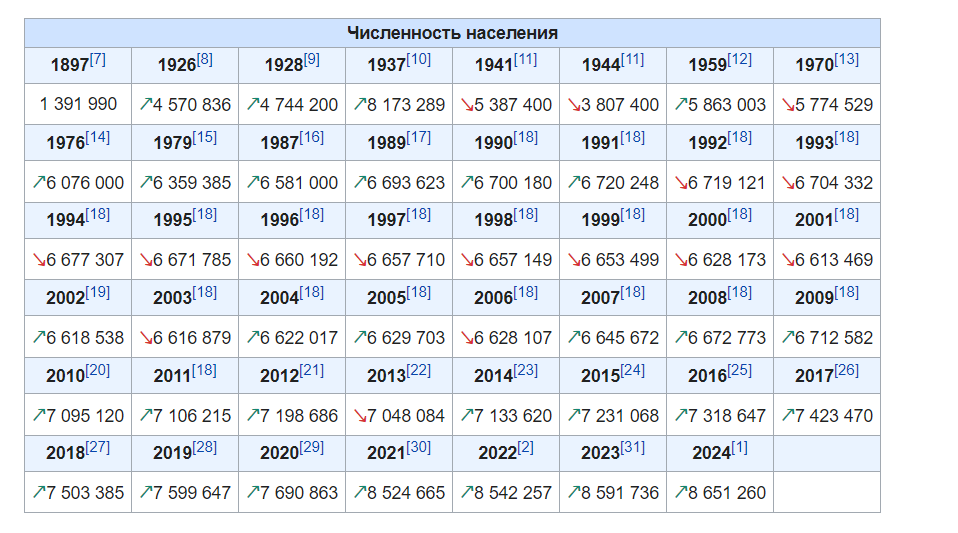

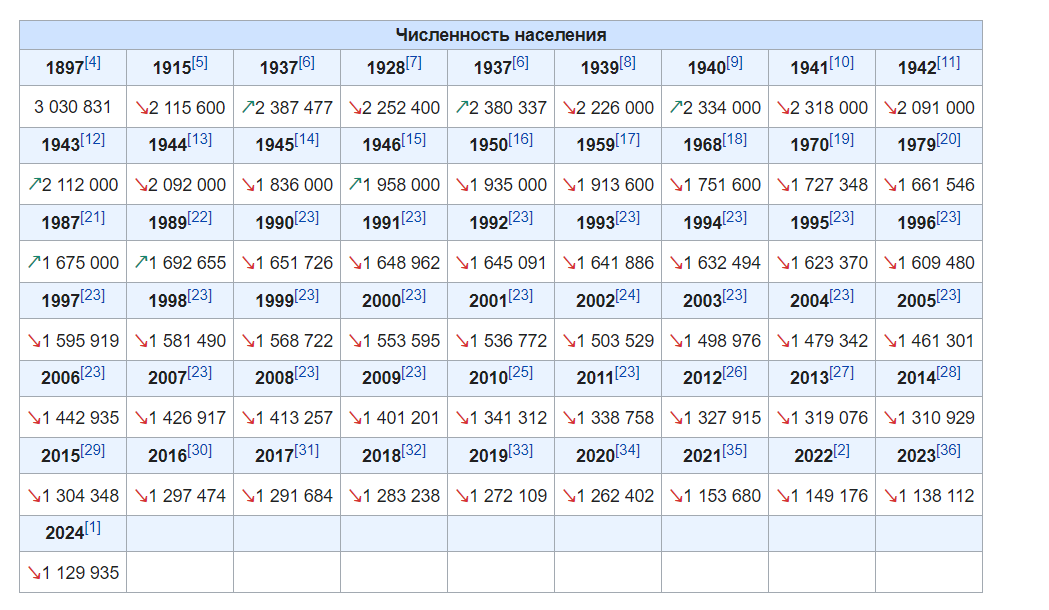

## Промежуточные выводы и рекомендации

Рекомендации заказчику:
* Использовать названия столбцов без `properties.`
* Сделать обязательным заполнение столбцов координат и схемы, если это необходимо. Выяснить причины, почему некоторые адреса не заполнены. Если этот столбец важен, сделать его заполнение обязательным.
* Дубликатов не обнаружено, идентификаторы аварий уникальны.
* Форматы данных неоптимальны, можно использовать типы данных, которые занимают меньше места для экономии.

Выводы:
* Аварий в летние месяцы ощутимо больше. По дням недели есть некоторая тенденция большего числа ДТП, но стоит уточнить, имеется ли такая динамика на большем числе данных.
* С ростом стажа аварий становится меньше, но важно также учитывать, сколько водителей в каждой категории по стажу.

## 3.4. Как распределено количество участников ДТП

In [72]:
df['participants_count'].value_counts()

participants_count
2     8611
3     2929
1     1533
4      909
5      353
6      109
7       44
8        9
9        9
10       5
12       2
11       2
30       1
14       1
Name: count, dtype: int64

In [73]:
df['participants_count'].describe()

count    14517.000000
mean         2.355721
std          1.004847
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: participants_count, dtype: float64

Заметим значение в 30 участников, что очень сильно выделяется. Скорее всего - выброс.
Построим графики для наглядности:

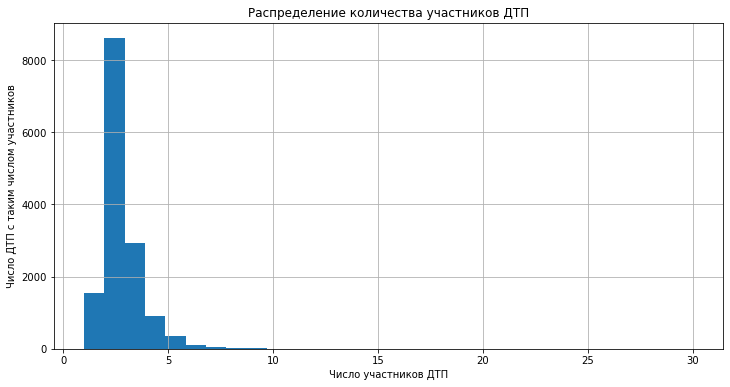

In [78]:
ax = df['participants_count'].hist(figsize=(12, 6), bins=30)
ax.set_title('Распределение количества участников ДТП')
ax.set_xlabel('Число участников ДТП')
ax.set_ylabel('Число ДТП с таким числом участников');

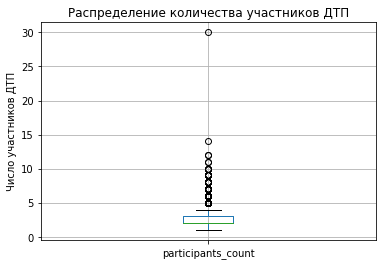

In [79]:
ax = df.boxplot(column='participants_count')
ax.set_title('Распределение количества участников ДТП')
ax.set_ylabel('Число участников ДТП');

Один из наиболее частых видов ДТП — столкновение, в котором два участника. Наезд на пешехода тоже предполагает двоих участников, поэтому большая часть значений находится около числа 2.

Проверим категории, чтобы убедиться в нашем предположении.

In [81]:
df.query('category in ["Наезд на пешехода", "Столкновение"]')['participants_count'].value_counts()

participants_count
2     6205
3     2368
4      752
5      304
6       97
7       39
8        7
9        6
10       5
12       2
14       1
11       1
Name: count, dtype: int64

## 3.5. Предположение о высокой корреляции

Можно догадаться о том, что большая положительная связь может быть между числом участников ДТП и числом пострадавших, проверим это:

In [83]:
df.corr(numeric_only=True)

,id,point_lat,point_long,scheme,injured_count,participants_count,month,year
id,1.000000,0.044838,0.000309,-0.033493,-0.001796,-0.011355,-0.007980,0.888992
point_lat,0.044838,1.000000,0.004421,0.022883,-0.029886,-0.000820,-0.019646,0.067893
point_long,0.000309,0.004421,1.000000,0.021997,-0.005333,-0.008409,-0.004749,0.000924
scheme,-0.033493,0.022883,0.021997,1.000000,-0.213594,-0.396280,0.031135,-0.023763
injured_count,-0.001796,-0.029886,-0.005333,-0.213594,1.000000,0.727196,-0.007597,-0.005117
participants_count,-0.011355,-0.000820,-0.008409,-0.396280,0.727196,1.000000,-0.039834,-0.012108
month,-0.007980,-0.019646,-0.004749,0.031135,-0.007597,-0.039834,1.000000,-0.088451
year,0.888992,0.067893,0.000924,-0.023763,-0.005117,-0.012108,-0.088451,1.000000


<AxesSubplot:>

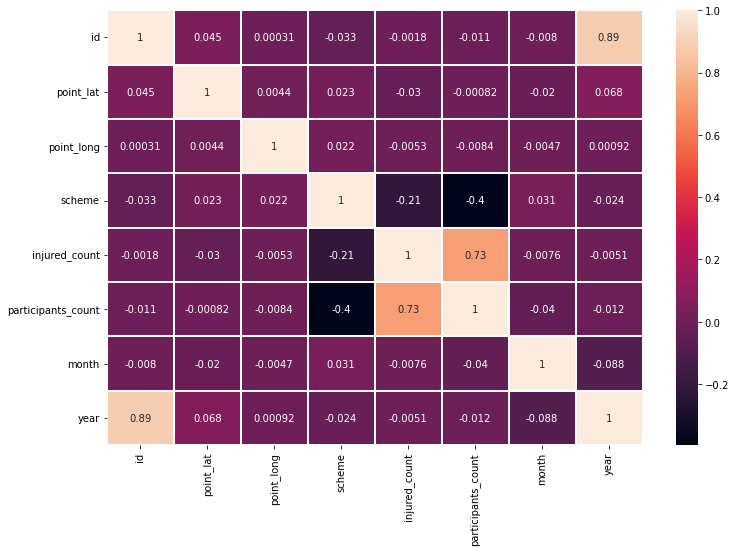

In [86]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), linewidth=0.1, annot=True)

И правда, число пострадавших и участников ДТП сильно коррелирует (0.73). Другие же столбцы сильно не выделяются, но стоит обратить внимание на значение между числом пострадавших и номером схемы (-0.21) и на значение между номером схемы и количеством участников ДТП (-0.4), это может говорить о том, что номер схемы связан с числом пострадавших и участников ДТП.

## 3.6. Как связаны категории аварий и погодные условия?

In [87]:
df.groupby(['weather', 'category'])['id'].nunique().sort_values()

weather                category                                                                                     
['Пасмурно']           Падение груза                                                                                       1
['Снегопад']           Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ       1
['Пасмурно', 'Дождь']  Отбрасывание предмета                                                                               1
                       Падение пассажира                                                                                   1
['Снегопад']           Наезд на животное                                                                                   1
                                                                                                                        ... 
['Ясно']               Съезд с дороги                                                                                    586
        

Есть строки, в которых указан список погодных явлений. Можно посмотреть на общее число ДТП по категориям.

In [88]:
df['category'].value_counts()

category
Столкновение                                                                                                 5423
Наезд на пешехода                                                                                            4364
Съезд с дороги                                                                                               1155
Опрокидывание                                                                                                1002
Падение пассажира                                                                                             738
Наезд на препятствие                                                                                          667
Наезд на велосипедиста                                                                                        589
Наезд на стоящее ТС                                                                                           312
Иной вид ДТП                                                                   

В датафрейме всего 14517 ДТП. Можно рассмотреть только часть всех аварий: взять топ-8 популярных ДТП и посмотреть, как эти категории распределены по разным погодным условиям. Так мы проанализируем большую часть данных, а остальные категории рассматривать не будем.

In [89]:
for category_name in df['category'].value_counts().head(8).index:
  display(df.query('category == @category_name').groupby(['weather', 'category'])['id'].nunique().sort_values(ascending = False))

weather                                category    
['Пасмурно']                           Столкновение    2514
['Ясно']                               Столкновение    2288
['Снегопад']                           Столкновение     274
['Дождь']                              Столкновение     205
['Пасмурно', 'Снегопад']               Столкновение      47
['Ясно', 'Температура выше +30С']      Столкновение      34
['Пасмурно', 'Дождь']                  Столкновение      21
['Метель']                             Столкновение      14
['Снегопад', 'Метель']                 Столкновение       8
['Ясно', 'Температура ниже -30С']      Столкновение       5
['Туман']                              Столкновение       4
['Пасмурно', 'Температура ниже -30С']  Столкновение       3
['Дождь', 'Снегопад']                  Столкновение       2
['Пасмурно', 'Туман']                  Столкновение       2
['Пасмурно', 'Метель']                 Столкновение       1
['Пасмурно', 'Ураганный ветер']        Столкнове

weather                                category         
['Пасмурно']                           Наезд на пешехода    2268
['Ясно']                               Наезд на пешехода    1572
['Дождь']                              Наезд на пешехода     220
['Снегопад']                           Наезд на пешехода     200
['Пасмурно', 'Дождь']                  Наезд на пешехода      36
['Пасмурно', 'Снегопад']               Наезд на пешехода      27
['Ясно', 'Температура выше +30С']      Наезд на пешехода      14
['Метель']                             Наезд на пешехода       9
['Туман']                              Наезд на пешехода       6
['Снегопад', 'Метель']                 Наезд на пешехода       4
['Дождь', 'Снегопад']                  Наезд на пешехода       2
['Пасмурно', 'Температура ниже -30С']  Наезд на пешехода       2
['Ясно', 'Температура ниже -30С']      Наезд на пешехода       2
['Дождь', 'Туман']                     Наезд на пешехода       1
['Пасмурно', 'Метель']           

weather                            category      
['Ясно']                           Съезд с дороги    586
['Пасмурно']                       Съезд с дороги    431
['Дождь']                          Съезд с дороги     51
['Снегопад']                       Съезд с дороги     50
['Пасмурно', 'Снегопад']           Съезд с дороги     13
['Пасмурно', 'Дождь']              Съезд с дороги     10
['Ясно', 'Температура выше +30С']  Съезд с дороги      6
['Метель']                         Съезд с дороги      2
['Туман']                          Съезд с дороги      2
['Пасмурно', 'Туман']              Съезд с дороги      1
['Пасмурно', 'Ураганный ветер']    Съезд с дороги      1
['Снегопад', 'Метель']             Съезд с дороги      1
['Ясно', 'Температура ниже -30С']  Съезд с дороги      1
Name: id, dtype: int64

weather                            category     
['Ясно']                           Опрокидывание    532
['Пасмурно']                       Опрокидывание    367
['Дождь']                          Опрокидывание     40
['Снегопад']                       Опрокидывание     27
['Пасмурно', 'Снегопад']           Опрокидывание     13
['Пасмурно', 'Дождь']              Опрокидывание     12
['Туман']                          Опрокидывание      3
['Ясно', 'Температура выше +30С']  Опрокидывание      3
['Метель']                         Опрокидывание      2
['Пасмурно', 'Туман']              Опрокидывание      2
['Пасмурно', 'Метель']             Опрокидывание      1
Name: id, dtype: int64

weather                                category         
['Пасмурно']                           Падение пассажира    390
['Ясно']                               Падение пассажира    315
['Дождь']                              Падение пассажира     18
['Снегопад']                           Падение пассажира      8
['Пасмурно', 'Снегопад']               Падение пассажира      2
['Пасмурно', 'Дождь']                  Падение пассажира      1
['Пасмурно', 'Температура ниже -30С']  Падение пассажира      1
['Ясно', 'Температура выше +30С']      Падение пассажира      1
['Ясно', 'Температура ниже -30С']      Падение пассажира      1
['Ясно', 'Туман']                      Падение пассажира      1
Name: id, dtype: int64

weather                            category            
['Ясно']                           Наезд на препятствие    304
['Пасмурно']                       Наезд на препятствие    300
['Дождь']                          Наезд на препятствие     26
['Снегопад']                       Наезд на препятствие     24
['Пасмурно', 'Снегопад']           Наезд на препятствие      4
['Ясно', 'Температура выше +30С']  Наезд на препятствие      4
['Пасмурно', 'Дождь']              Наезд на препятствие      2
['Туман']                          Наезд на препятствие      2
['Ясно', 'Температура ниже -30С']  Наезд на препятствие      1
Name: id, dtype: int64

weather                            category              
['Ясно']                           Наезд на велосипедиста    397
['Пасмурно']                       Наезд на велосипедиста    171
['Дождь']                          Наезд на велосипедиста     17
['Ясно', 'Температура выше +30С']  Наезд на велосипедиста      2
['Пасмурно', 'Дождь']              Наезд на велосипедиста      1
['Снегопад']                       Наезд на велосипедиста      1
Name: id, dtype: int64

Рассмотрим первые две категории, которые включают 60% ДТП. Здесь видны как сходства, так и различия. К примеру, большее число ДТП каждого из видов произошло в пасмурную погоду — это кажется довольно логичным. А разница в числе ДТП с наездом в пасмурные и ясные дни отличается от разницы ДТП со столкновением в тех же погодных условиях. Возможно, при ясной погоде пешеходов замечают лучше, чем другую машину. Причину этой тенденции можно предположить в том, что при столкновении двух машин скорость сближения выше, чем при столкновении пешехода и машины.

На третьем и четвёртом месте по популярности расположились категории, в которых наиболее популярной погода была «Ясно», что является не очень тривиальным показателем.

## 3.7. Процентная разбивка аварий по видам освещённости

По заданию заказчика непонятно, работать с водителями или со всеми участниками аварий? Так как уточнить возмодности нет, будем работать с водителями, так как это более очевидно.

Вспомним про дубликаты и еще раз проверим:

In [91]:
df_p.query('role == "Водитель"')['id'].value_counts()

id
1985567    6
2649405    6
1984910    6
1984276    6
2889522    5
          ..
2795031    1
2754524    1
1988533    1
2498736    1
2847894    1
Name: count, Length: 13025, dtype: int64

Избавимся от дубликатов

In [92]:
df_p = df_p.query('role == "Водитель"')
df_p = df_p.drop_duplicates(subset = 'id')

In [94]:
df_res = df_p.merge(df, on = 'id')

In [95]:
df_percent = df_res.groupby(['gender', 'light'])['id'].nunique().reset_index().sort_values('light')
df_percent['prcnt'] = 100*df_percent['id'] / ([df_res.query('gender == "Женский"')['id'].nunique(), df_res.query('gender == "Мужской"')['id'].nunique()] * 5)

In [96]:
df_percent.sort_values(['gender', 'prcnt'], ascending = False)

,gender,light,id,prcnt
8,Мужской,Светлое время суток,6905,63.658154
5,Мужской,"В темное время суток, освещение включено",2372,21.867798
7,Мужской,"В темное время суток, освещение отсутствует",1067,9.836821
9,Мужской,Сумерки,339,3.125288
6,Мужской,"В темное время суток, освещение не включено",164,1.511939
3,Женский,Светлое время суток,1096,64.243845
0,Женский,"В темное время суток, освещение включено",376,22.039859
2,Женский,"В темное время суток, освещение отсутствует",168,9.847597
4,Женский,Сумерки,48,2.813599
1,Женский,"В темное время суток, освещение не включено",18,1.055100


Видим близкие относительные значения вне зависимости от пола. При этом для обоих полов характерно наибольшее число аварий в светлое время суток. В будущем интересно выяснить, какая характерная освещённость будет в разных городах.

## 3.8. Чем отличаются аварии без пострадавших от тех, в которых был один пострадавший или более?

In [98]:
df_res[df_res['injured_count'] == 0]

,role,gender,violations,health_status,years_of_driving_experience,id,category_exp,category_exp_extra,category_exp_5,geometry_coordinates,...,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories,day_of_week,month,year


Данных без пострадавших нет, следовательно, будем опираться на столбец `health_status`

In [99]:
df_res['injured_count'].value_counts()

injured_count
1     10445
2      1711
3       540
4       212
5        72
6        26
7        10
8         4
9         2
30        1
10        1
12        1
Name: count, dtype: int64

Проще сохранить `id` аварий с пострадавшими, так как в аварии может быть несколько участников и сложнее проверить, что не все из них пострадали.

In [100]:
ids_injured = df_res.query('health_status != "Не пострадал"')['id'].unique()

In [101]:
df.head()

,geometry_coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,...,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories,day_of_week,month,year
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,...,Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники'],Saturday,7,2017
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",...,Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']",Tuesday,9,2023
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",...,Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники'],Friday,7,2021
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",...,Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']",Monday,5,2021
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",...,Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники'],Wednesday,5,2018


Пройдёмся по столбцам с признаками ДТП, которые могут повлиять на `health_status`, и проверим, будет ли разница.

Действия при этом будут похожи, поэтому осуществим некоторую автоматизацию. Сначала выведем разбивку по разным типам ДТП с пострадавшими, а ниже разбивку по ДТП без пострадавших.

/Users/artemiy/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:2107: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)
/Users/artemiy/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:2107: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)
/Users/artemiy/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:2107: MatplotlibDeprecationWarning: normalize=None do

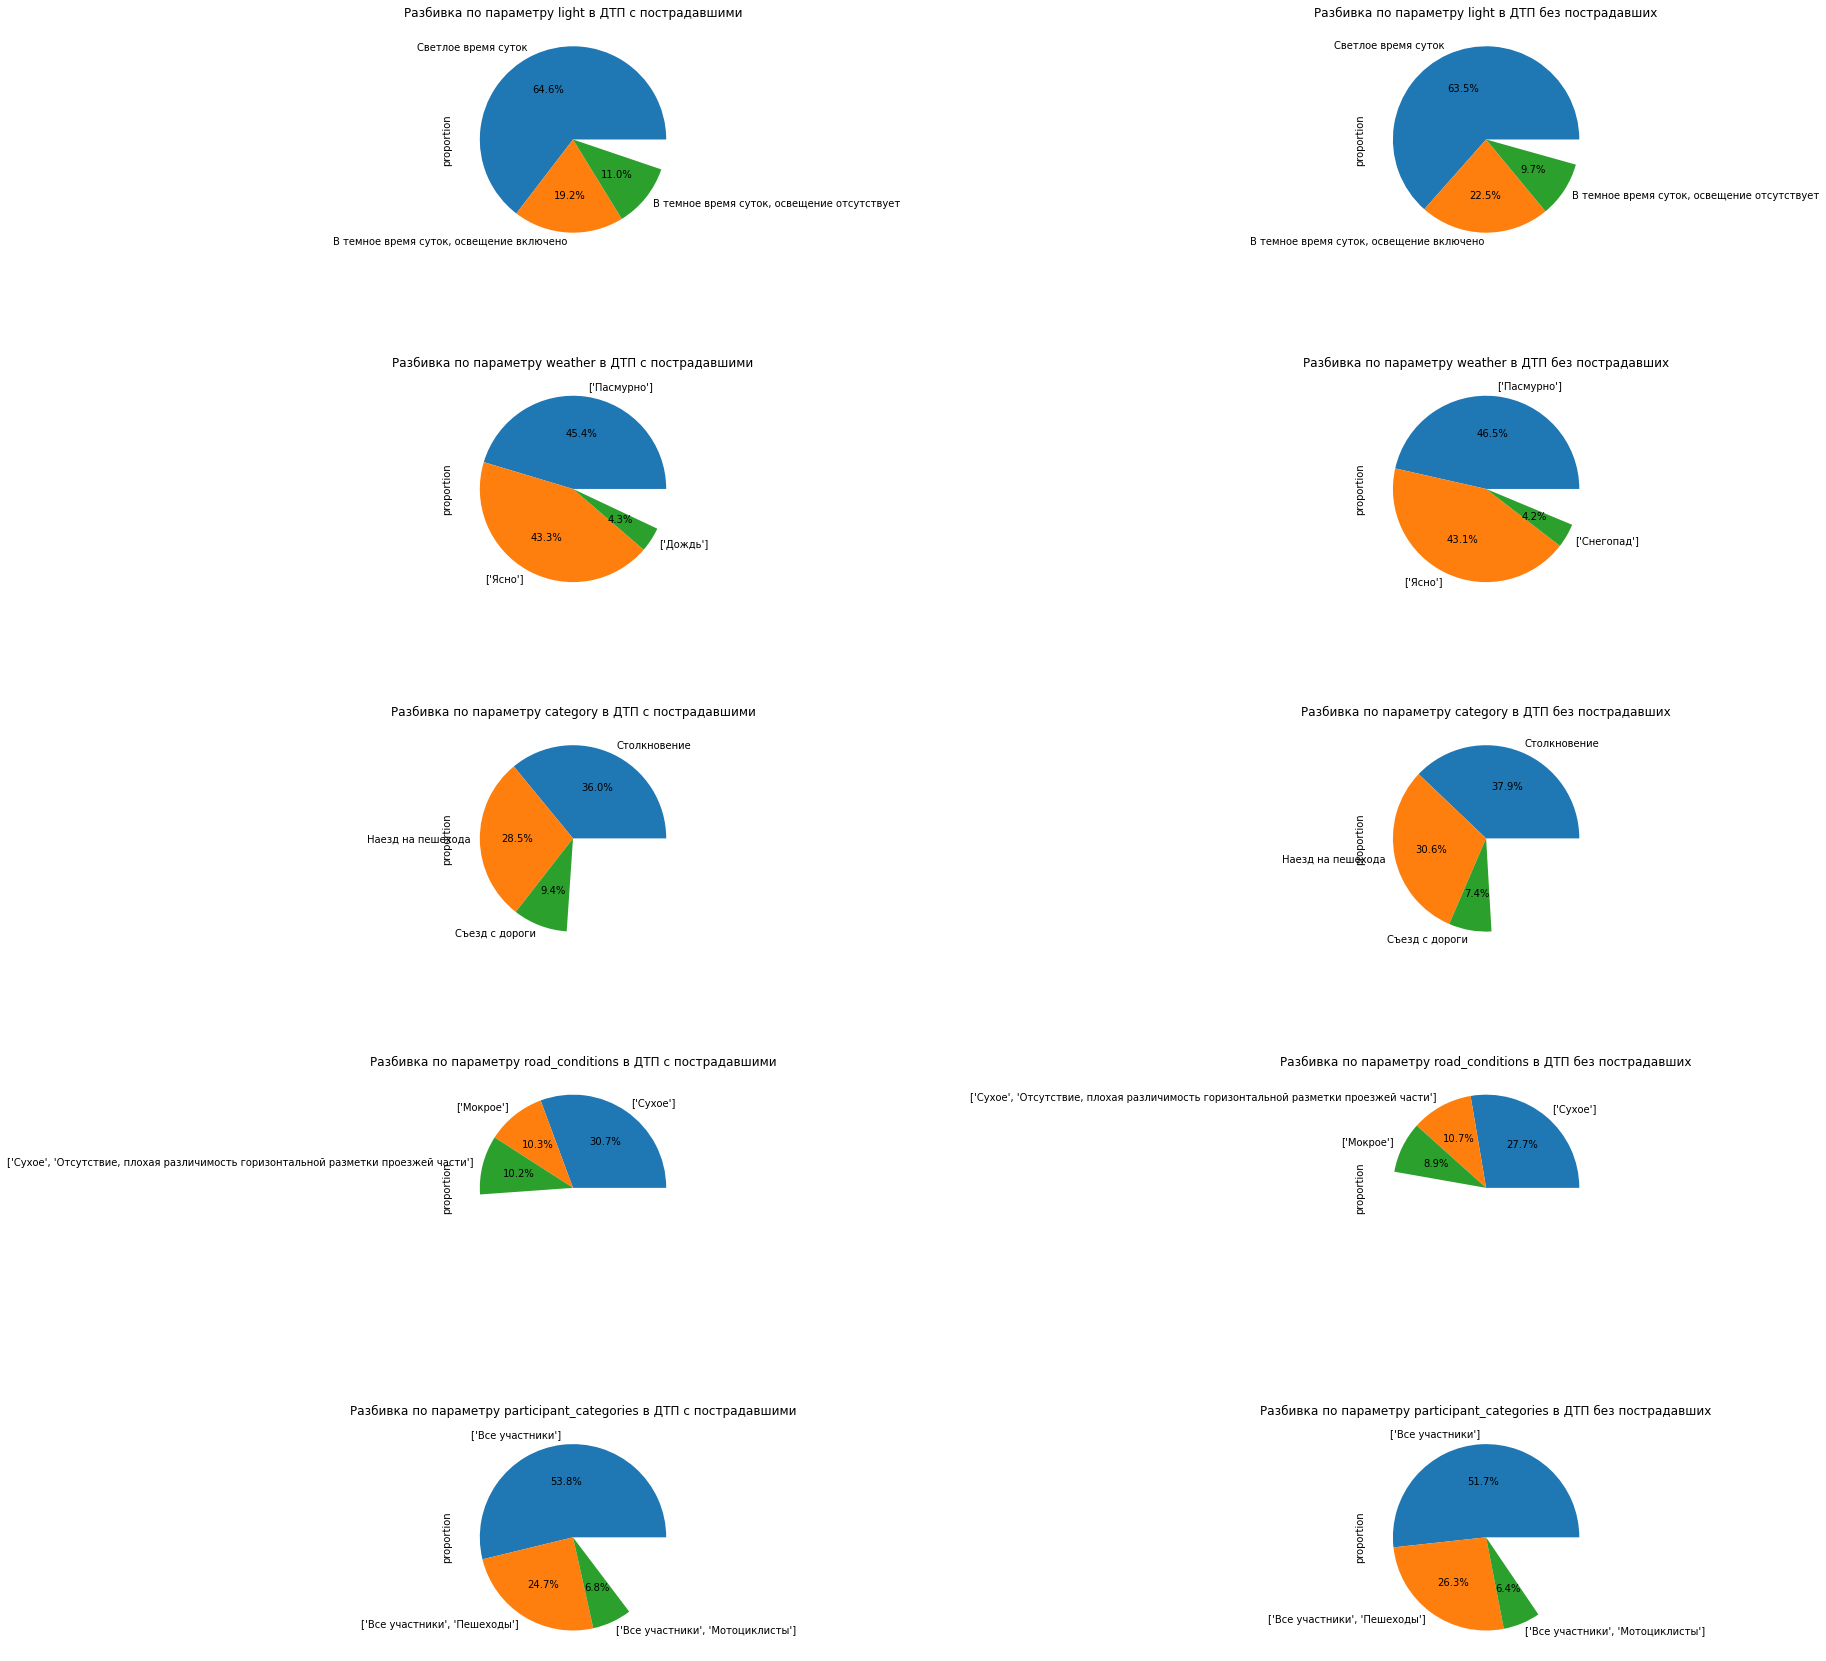

In [111]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=5, ncols=2,  figsize=(30, 30))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

counter = 0
for column_name in ['light', 'weather', 'category', 'road_conditions', 'participant_categories']:
  df_injured = df.query('id in @ids_injured')[column_name].value_counts(normalize = True).reset_index()[0:3]
  df_no_injured = df.query('id not in @ids_injured')[column_name].value_counts(normalize = True).reset_index()[0:3]

  df_injured.plot.pie(ax=axes[counter, 0], y='proportion', autopct='%1.1f%%', labels= df_injured[column_name], legend=False)
  axes[counter, 0].title.set_text(f'Разбивка по параметру {column_name} в ДТП с пострадавшими')

  df_no_injured.plot.pie(ax=axes[counter, 1],y='proportion', autopct='%1.1f%%', labels= df_no_injured[column_name], legend=False)
  axes[counter, 1].title.set_text(f'Разбивка по параметру {column_name} в ДТП без пострадавших')

  counter += 1

Мы рассмотрели несколько признаков, и по ним не видно различий в относительных долях ДТП с пострадавшими и без.

На визуализации в разбивке по `road_conditions` подписи секторов оказались длинными, и их стоит сократить.

In [112]:
df['road_conditions'].replace("['Сухое', 'Отсутствие, плохая различимость горизонтальной разметки проезжей части']",
                              "['Сухое', 'Разметка не различима']").value_counts()

road_conditions
['Сухое']                                                                                                                                                                                           4135
['Сухое', 'Разметка не различима']                                                                                                                                                                  1534
['Мокрое']                                                                                                                                                                                          1342
['Обработанное противогололедными материалами']                                                                                                                                                      886
['Заснеженное']                                                                                                                                                                     

/Users/artemiy/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:2107: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)
/Users/artemiy/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:2107: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)
/Users/artemiy/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:2107: MatplotlibDeprecationWarning: normalize=None do

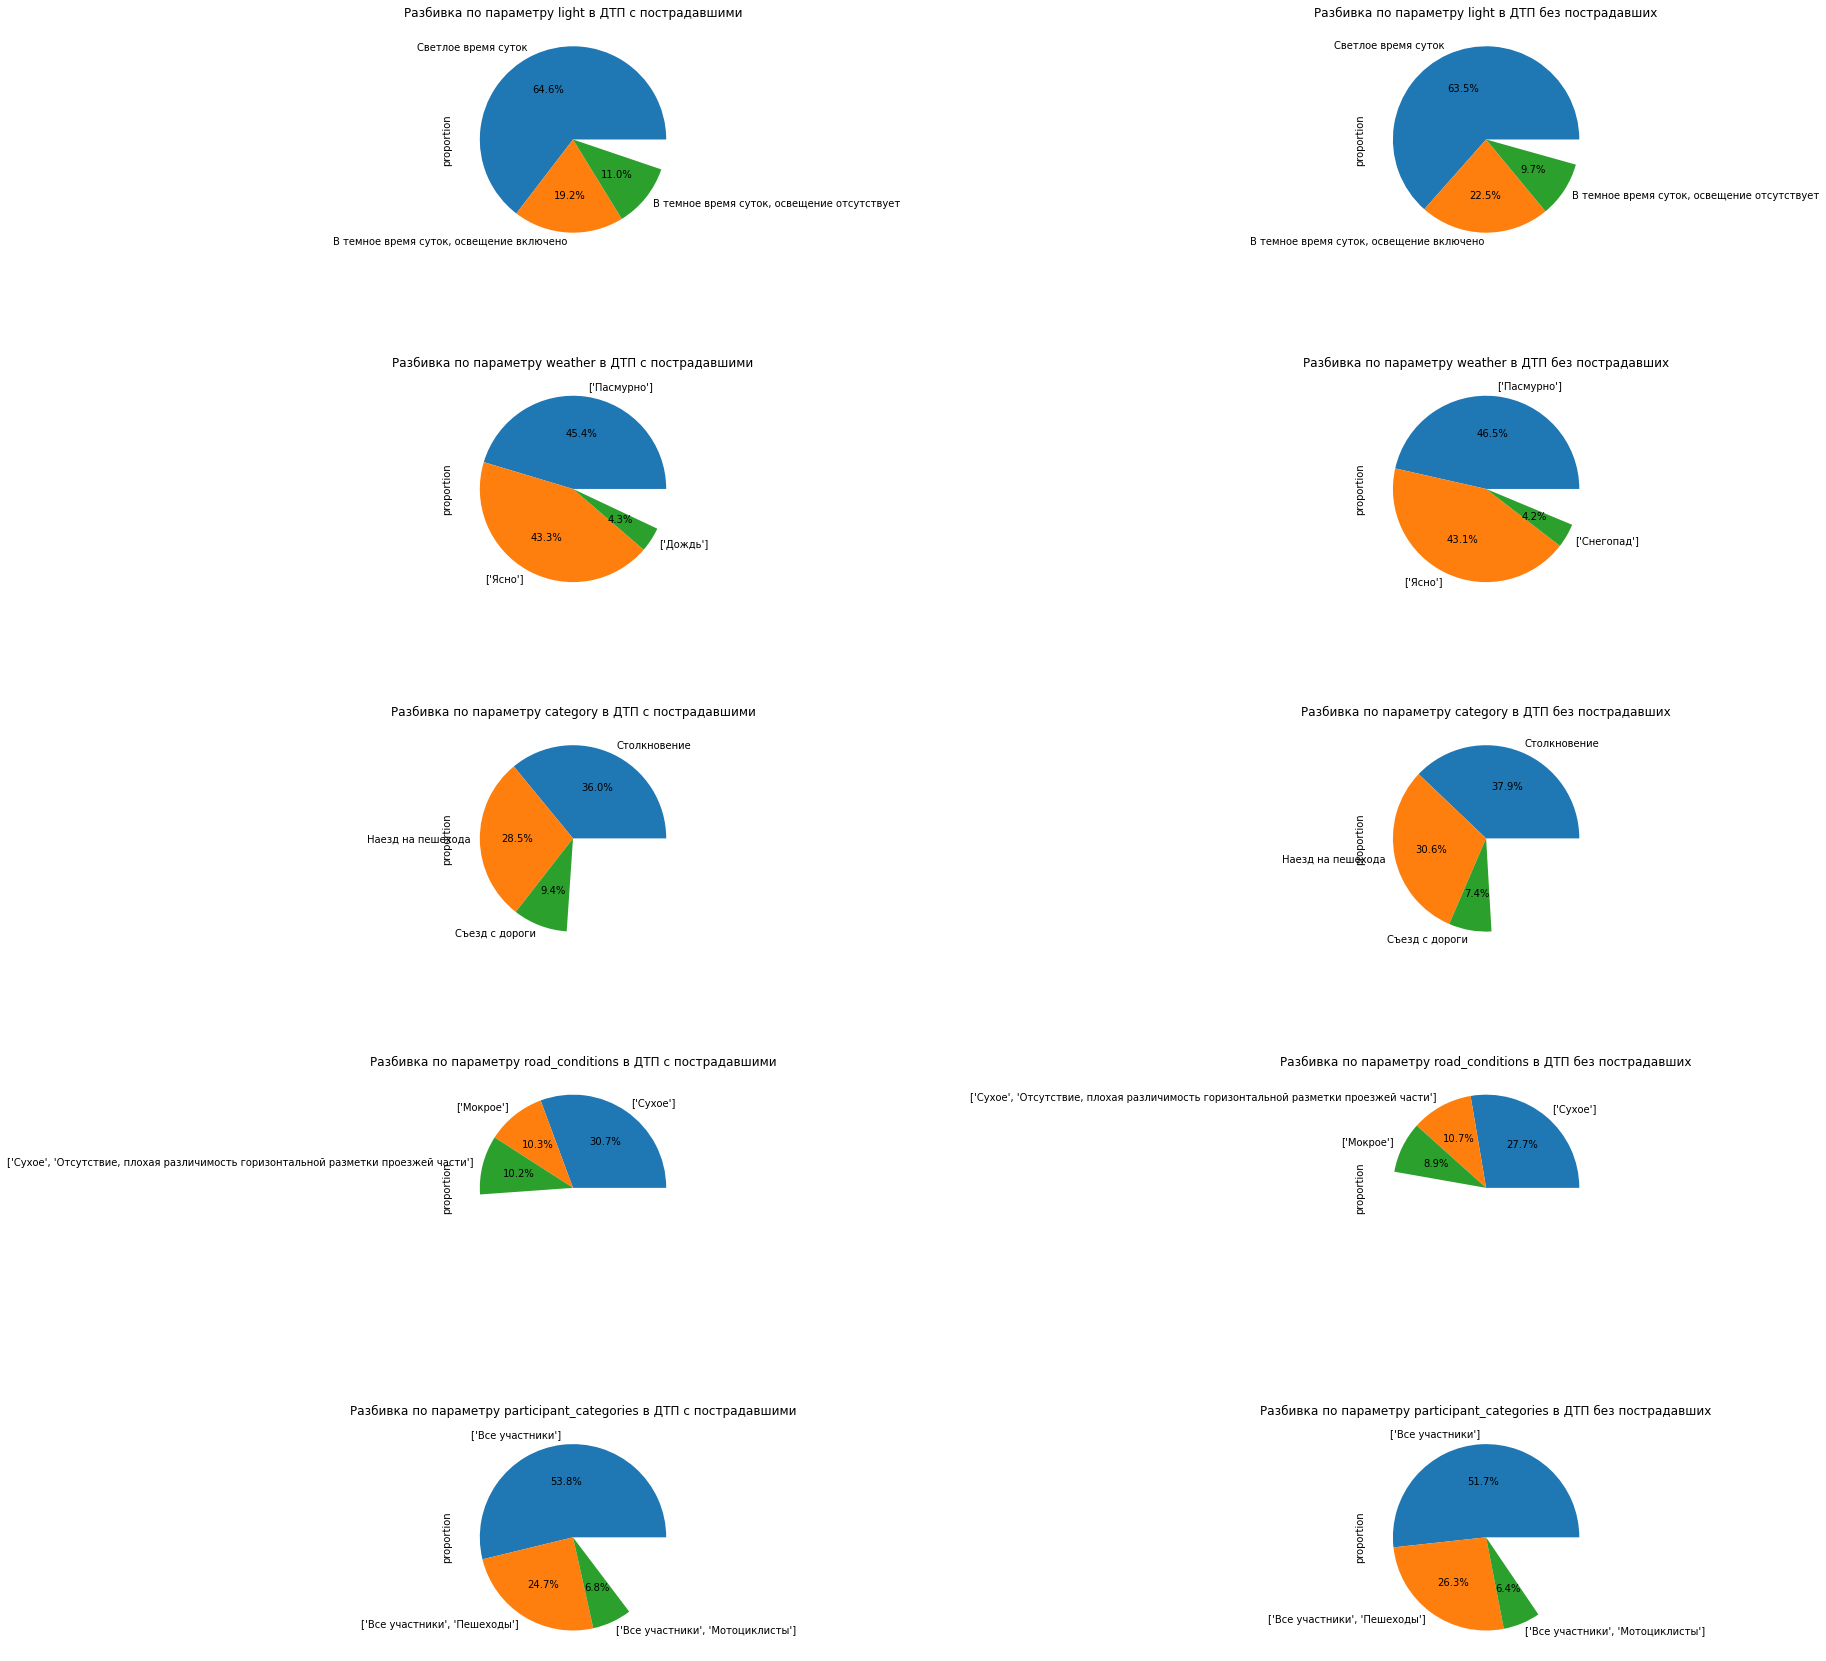

In [113]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=5, ncols=2,  figsize=(30, 30))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

counter = 0
for column_name in ['light', 'weather', 'category', 'road_conditions', 'participant_categories']:
  df_injured = df.query('id in @ids_injured')[column_name].value_counts(normalize = True).reset_index()[0:3]
  df_no_injured = df.query('id not in @ids_injured')[column_name].value_counts(normalize = True).reset_index()[0:3]

  df_injured.plot.pie(ax=axes[counter, 0], y='proportion', autopct='%1.1f%%', labels= df_injured[column_name], legend=False)
  axes[counter, 0].title.set_text(f'Разбивка по параметру {column_name} в ДТП с пострадавшими')

  df_no_injured.plot.pie(ax=axes[counter, 1],y='proportion', autopct='%1.1f%%', labels= df_no_injured[column_name], legend=False)
  axes[counter, 1].title.set_text(f'Разбивка по параметру {column_name} в ДТП без пострадавших')

  counter += 1

# Общие выводы исследования и рекомендации

1. Самые распространённые аварии — столкновение и наезд на пешехода — происходят при пасмурной погоде. Разрыв в числе столкновений при ясной и пасмурной погоде несущественный, однако наезды на пешеходов при ясной погоде происходят реже. Возможно, при столкновении двух машин скорость сближения выше, чем при столкновении пешехода и машины. Стоит также отметить, что съезд с дороги, опрокидывания и наезды на препятствия случались чаще в ясную погоду.

2. В разбивке по полам и освещённости различий не обнаружено. Также похожи значения топ-3 для разных признаков ДТП в зависимости от наличия пострадавших.

3. Обнаружено, что наиболее распространённое количество пострадавших в авариях — 2. Это может быть связано с самыми частыми типами аварий — «столкновение» и «наезд на пешехода».

4. В данных встречается ДТП с 30 участниками.

5. В датасете число пострадавших в `injured_count` не согласуется с `health_status`. Стоит узнать у заказчика, почему так произошло.